In [16]:
import pandas as pd

Дана таблица с данными о ежедневной выработке энергии солнечными батареями. Информация содержится в двух столбцах:

- date — дата наблюдения;
- cum_power — накопленная (кумулятивная) выработка энергии на указанный день.

Таким образом, перед вами классический пример временного ряда — числовой показатель, зависящий от времени. Давайте с ним поработаем.

Для начала прочитаем таблицу и выведем первые пять её строк:

In [17]:
solar_data = pd.read_csv('data/solarpower.csv')
solar_data.head()

,date,cum_power
0,2017-01-01,20111.0
1,2017-01-02,20112.0
2,2017-01-03,20115.0
3,2017-01-04,20117.0
4,2017-01-05,20119.0


In [18]:
# Заполнение пропусков средним арифметическим между соседними значениями
for i in range(1, len(solar_data['cum_power']) - 1):
    if solar_data.at[i, 'cum_power'] == -1:
        solar_data.at[i, 'cum_power'] = (solar_data.at[i-1, 'cum_power'] + solar_data.at[i+1, 'cum_power']) / 2

# В случае если пропуск -1 в начале или в конце, обработка их в отдельности
if solar_data.at[0, 'cum_power'] == -1:
    solar_data.at[0, 'cum_power'] = solar_data.at[1, 'cum_power']
if solar_data.at[len(solar_data['cum_power']) - 1, 'cum_power'] == -1:
    solar_data.at[len(solar_data['cum_power']) - 1, 'cum_power'] = solar_data.at[len(solar_data['cum_power']) - 2, 'cum_power']

# Вычисление среднего арифметического столбца cum_power
mean_cum_power = solar_data['cum_power'].mean()
print(round(mean_cum_power))

# Вывод DataFrame для проверки
print(solar_data.head(5))

df = solar_data

23848
         date  cum_power
0  2017-01-01    20111.0
1  2017-01-02    20112.0
2  2017-01-03    20115.0
3  2017-01-04    20117.0
4  2017-01-05    20119.0


In [19]:
# Создание столбца day_power — ежедневная выработка энергии
df['day_power'] = df['cum_power'].diff().fillna(0)

# Выделение месяца и года из даты
df['year_month'] = pd.to_datetime(df['date']).dt.to_period('M')

# Группировка данных по периодам и расчёт среднего в столбце day_power
monthly_avg_power = df.groupby('year_month')['day_power'].mean()

# Получение среднего значения для марта 2017 года
march_2017_avg_power = monthly_avg_power['2017-03']

# Округление до целого числа
march_2017_avg_power_rounded = round(march_2017_avg_power)

print(march_2017_avg_power_rounded)


11


In [20]:
monthly_avg_power.head()

year_month
2017-01     3.129032
2017-02     3.714286
2017-03    10.774194
2017-04    16.300000
2017-05    19.000000
Freq: M, Name: day_power, dtype: float64

In [21]:
import matplotlib.pyplot as plt

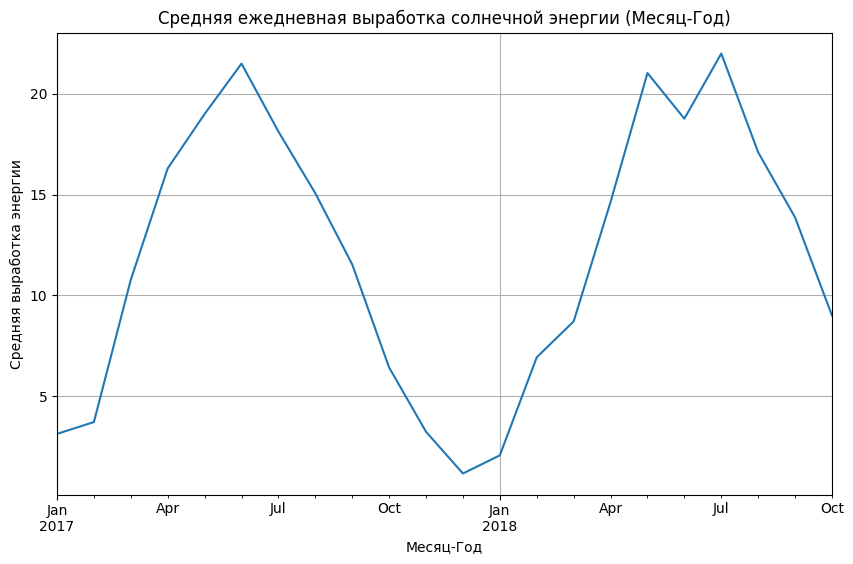

In [22]:
# Построение графика
plt.figure(figsize=(10, 6))
monthly_avg_power.plot()

# Подпись осей и самого графика
plt.title('Средняя ежедневная выработка солнечной энергии (Месяц-Год)')
plt.xlabel('Месяц-Год')
plt.ylabel('Средняя выработка энергии')
plt.grid(True)
plt.show()
